In [3]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

# Acquire, load, and preview the data.
data = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [ 2.93888937]

R-squared:
0.897210638179


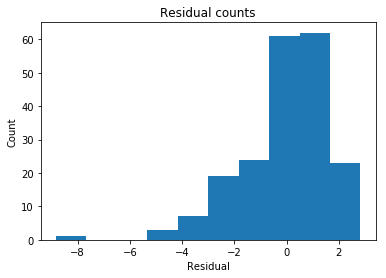

In [4]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

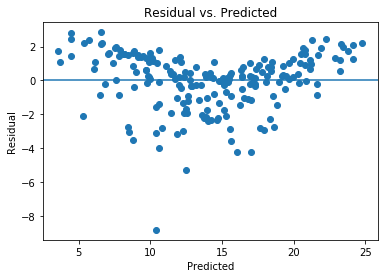

In [5]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

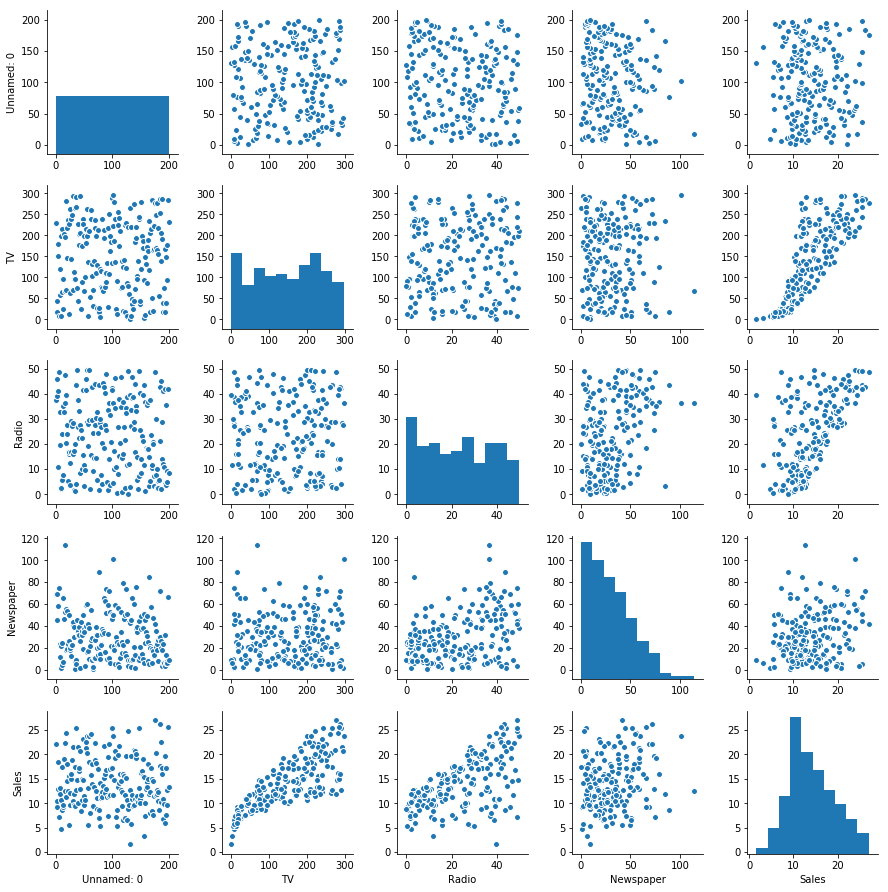

In [6]:
import seaborn as sns

sns.pairplot(data)

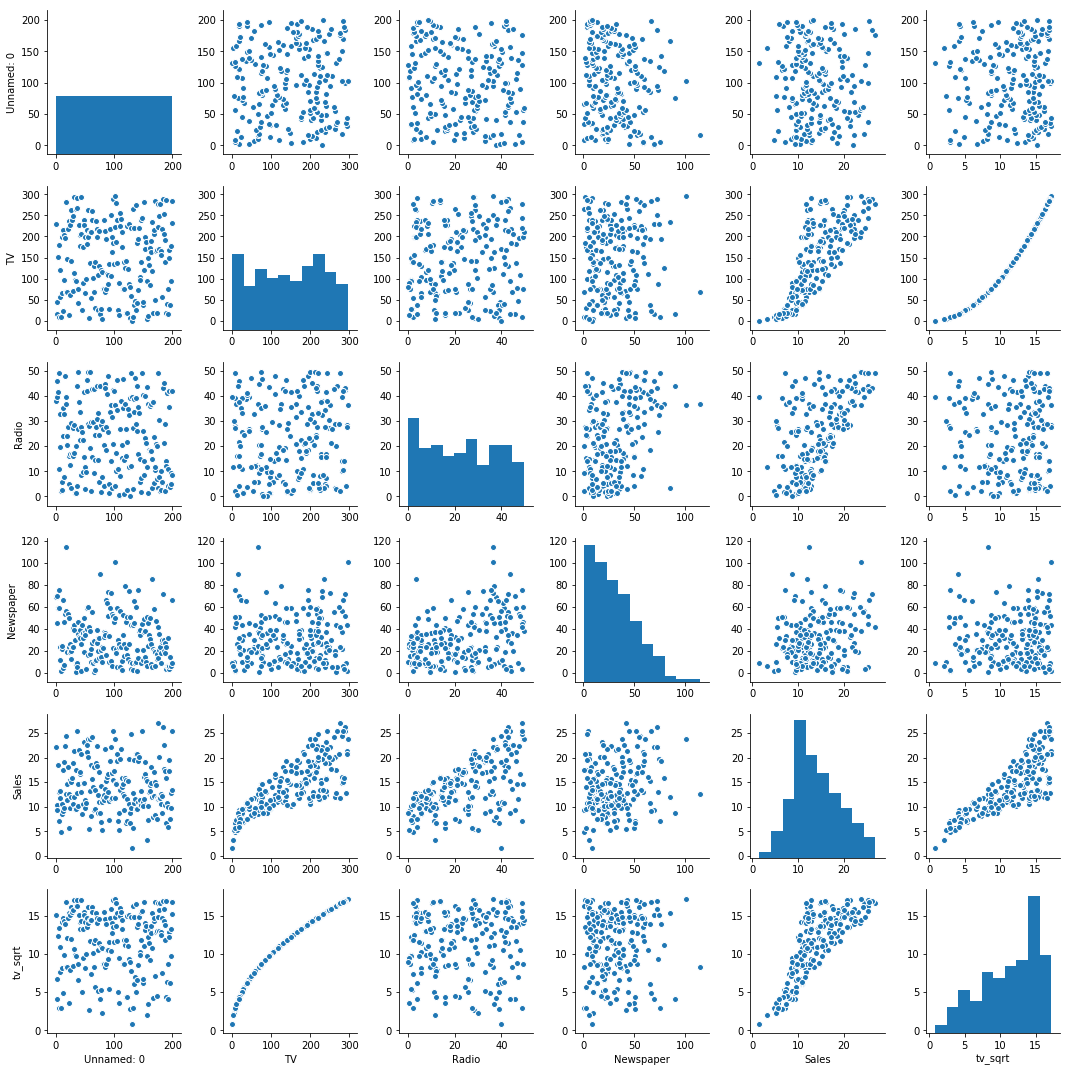

In [8]:
data['tv_sqrt'] = np.sqrt(data['TV'])
sns.pairplot(data)


Coefficients: 
 [[  3.73633658e-02   6.13038926e-03   9.33047657e-05]]

Intercept: 
 [ 1.33672432]

R-squared:
0.921991574317


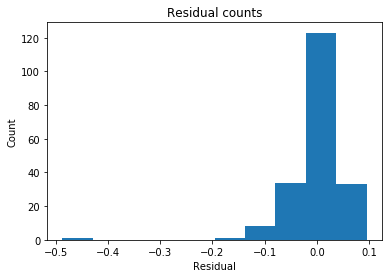

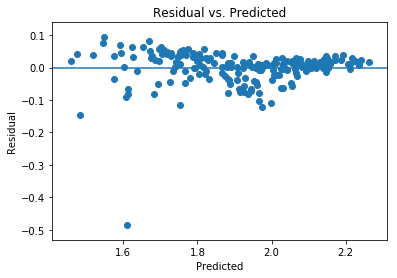

In [12]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
power = 0.25
data['sales_pwr'] = data['Sales']**power
Y = data['sales_pwr'].values.reshape(-1, 1)
X = data[['tv_sqrt','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['sales_pwr']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [13]:
# Identifying the outlier
residual.argmax()

91

In [17]:
print(data.iloc[80:93,:])

    Unnamed: 0      TV  Radio  Newspaper  Sales  tv_sqrt  sales_pwr
80          81  76.400 26.700     22.300 11.800    8.741      1.853
81          82 239.800  4.100     36.900 12.300   15.485      1.873
82          83  75.300 20.300     32.500 11.300    8.678      1.833
83          84  68.400 44.500     35.600 13.600    8.270      1.920
84          85 213.500 43.000     33.800 21.700   14.612      2.158
85          86 193.200 18.400     65.700 15.200   13.900      1.975
86          87  76.300 27.500     16.000 12.000    8.735      1.861
87          88 110.700 40.600     63.200 16.000   10.521      2.000
88          89  88.300 25.500     73.400 12.900    9.397      1.895
89          90 109.800 47.800     51.400 16.700   10.479      2.022
90          91 134.300  4.900      9.300 11.200   11.589      1.829
91          92  28.600  1.500     33.000  7.300    5.348      1.644
92          93 217.700 33.500     59.000 19.400   14.755      2.099


May consider removing the datapoint above given the context of the research question.